In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

print(f'Tensorflow version: {tensorflow.__version__}')


Tensorflow version: 2.16.1


Total classes are: 3


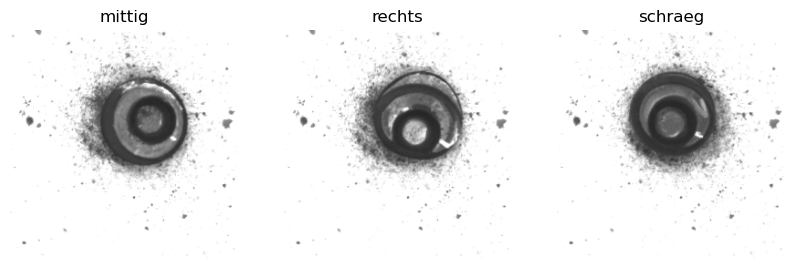

In [2]:
#Daten zeigen
data_folder = "C:\LUH\Master\Masterarbeit\Stereo_camera_program\Daten\Halbzeug_Position"

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(f'Total classes are: {len(classes)}')

# Show the first image in each folder
fig = plt.figure(figsize=(10,6))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a = fig.add_subplot(1, len(classes), i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[i-1])
plt.show()  

input_shape = (250, 250, 3)  # Assuming 150x150 RGB images
num_classes = 3  # Number of output classes
batch_size = 32


In [3]:
#Daten laden
img_size = (250, 250)
batch_size = 30

print("Getting Data...")
datagen_train = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.1, # hold back 30% of the images for validation
                             #horizontal_flip=True,
                             #brightness_range=(0.7,1.4)
                             ) 

datagen_valid = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.1 # hold back 30% of the images for validation
                             ) 

print("Preparing training dataset...")
train_generator = datagen_train.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen_valid.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')
print(classnames)

Getting Data...
Preparing training dataset...
Found 1237 images belonging to 3 classes.
Preparing validation dataset...
Found 137 images belonging to 3 classes.
Data generators ready
['mittig', 'rechts', 'schraeg']


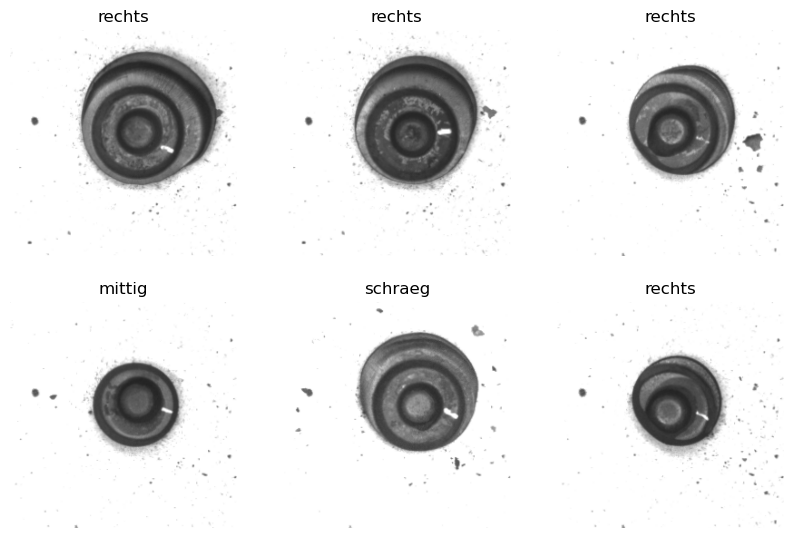

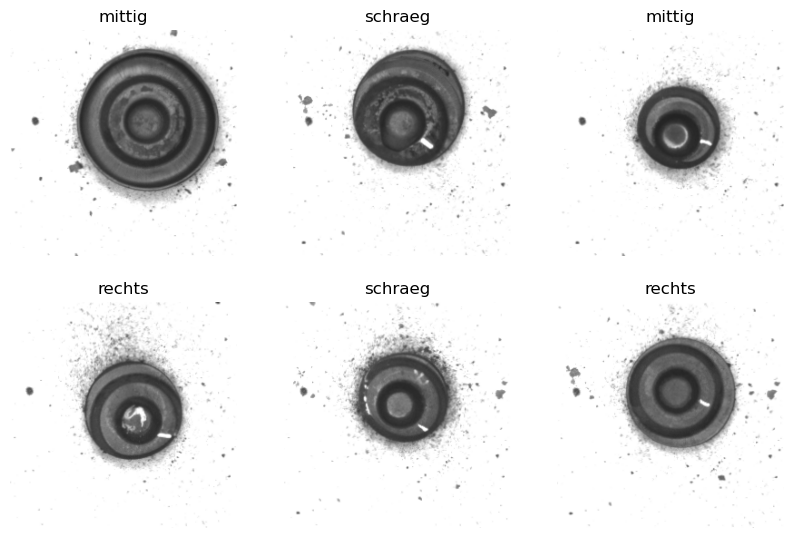

In [4]:
#geladenen Daten zeigen
import matplotlib.pyplot as plt

valid_batch_images, valid_batch_labels = next(validation_generator)
train_batch_images, train_batch_labels = next(train_generator)
# Define a function to display images
def show_images(images, labels):
    # Create a grid of 3x3 images
    plt.figure(figsize=(10, 10))
    for i in range(6):
        condition = labels[i] == 1.  
        indices = np.where(condition)
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(classnames[int(indices[0])])
        plt.axis('off')  # Hide axis
    plt.show()

# Display the batch of images
show_images(valid_batch_images, valid_batch_labels)
show_images(train_batch_images, train_batch_labels)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

#Modell Archetektur
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    13,779,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,872,707 (52.92 MB)

 Trainable params: 13,872,707 (52.92 MB)

 Non-trainable params: 0 (0.00 B)

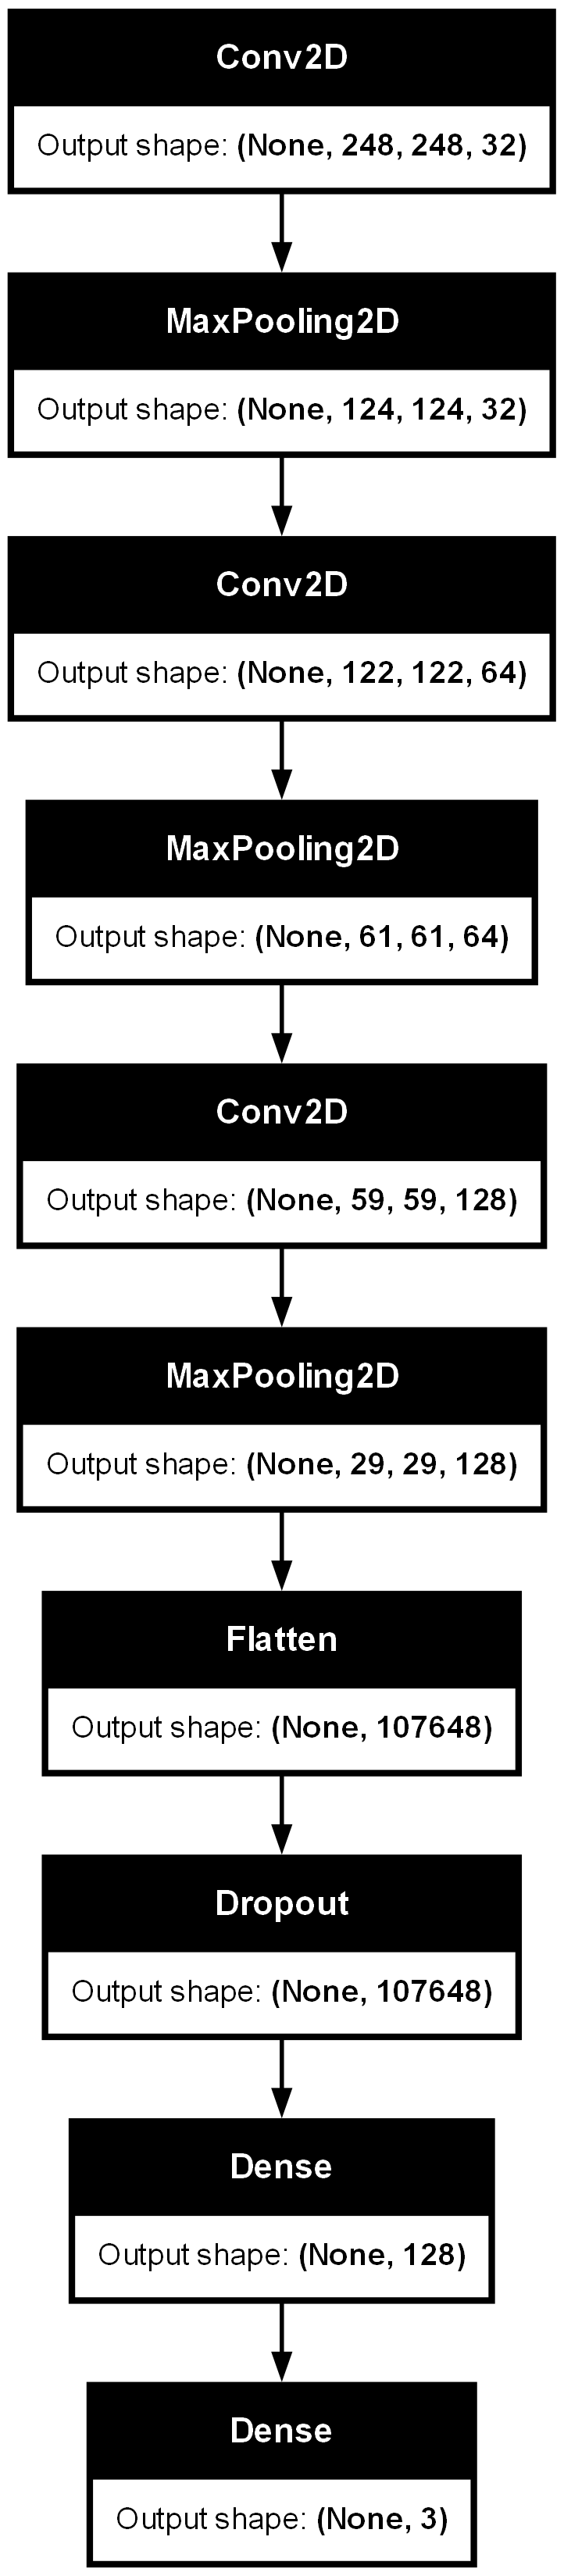

In [7]:
#Modell Graphik
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='cnn_pos.png',show_shapes=True)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
#Modell trainieren
checkpoint_filepath = '/tmp/checkpoint.keras'
model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

callbacks = [
             #EarlyStopping(patience=2),
             model_checkpoint_callback,
]

num_epochs = 30


history= model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/30


C:\Users\nikla\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 864ms/step - accuracy: 0.3538 - loss: 1.4690 - val_accuracy: 0.3917 - val_loss: 1.0944
Epoch 2/30
 1/41 ━━━━━━━━━━━━━━━━━━━━ 33s 840ms/step - accuracy: 0.4333 - loss: 1.0924

d:\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4333 - loss: 0.5595 - val_accuracy: 0.4118 - val_loss: 0.5448
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 821ms/step - accuracy: 0.3722 - loss: 1.0958 - val_accuracy: 0.3667 - val_loss: 1.0951
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4667 - loss: 0.5493 - val_accuracy: 0.4118 - val_loss: 0.5422
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.3547 - loss: 1.0884 - val_accuracy: 0.4750 - val_loss: 1.0644
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3000 - loss: 0.5665 - val_accuracy: 0.4118 - val_loss: 0.5358
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.4155 - loss: 1.0572 - val_accuracy: 0.4250 - val_loss: 0.9848
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4667 - loss: 0.5120 - val_accuracy: 0.2941 - val_loss: 0.5578
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.4546 - loss: 1.0261 - val_accuracy: 0.4667 - val_loss: 1.0194


In [ ]:
# Save the trained model
modelFileName = 'cnn_pos.keras'
model.save(modelFileName)
print('model saved as', modelFileName) 

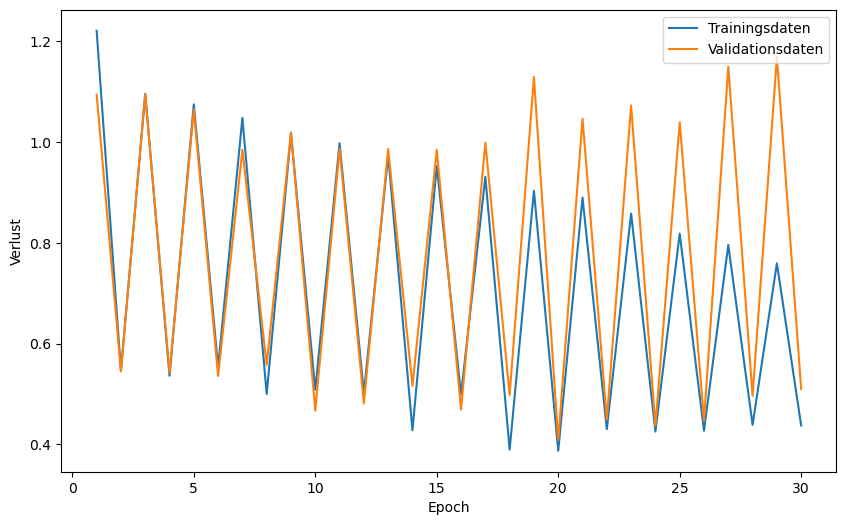

In [10]:
#python -m tensorboard.main --logdir="C:\LUH\Master\Masterarbeit\Stereo_camera_program\CNN\logs"

#Trainingsverlauf
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
epoch_nums = range(1,len(training_loss)+1)
plt.figure(figsize=(10,6))
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('Epoch')
plt.ylabel('Verlust')
plt.legend(['Trainingsdaten ', 'Validationsdaten'], loc='upper right')
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


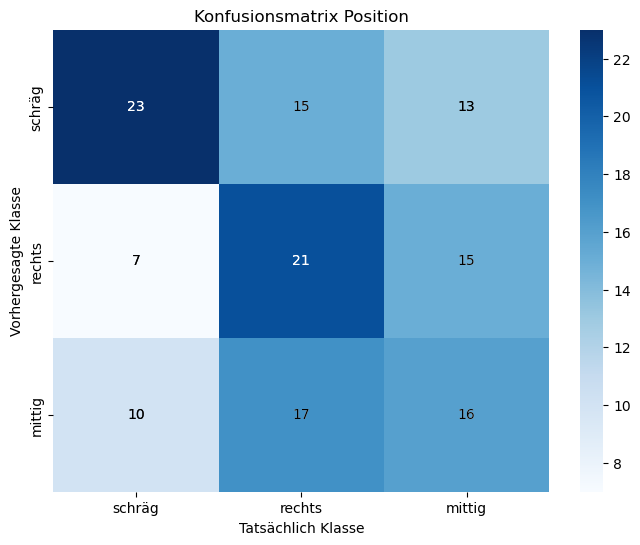

In [20]:
#Konfusuionsmatric
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to accumulate predictions and true labels
all_predictions = []
all_true_labels = []

# Iterate through the validation generator to collect all data
for i in range(len(validation_generator)):
    x_test = validation_generator[i][0]
    y_test = validation_generator[i][1]
    
    class_probabilities = model.predict(x_test)
    predictions = np.argmax(class_probabilities, axis=1)
    true_labels = np.argmax(y_test, axis=1)
    
    all_predictions.extend(predictions)
    all_true_labels.extend(true_labels)

# Convert lists to numpy arrays
all_true_labels = np.array(all_true_labels)
all_predictions = np.array(all_predictions)

# Calculate confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Plot the confusion matrix
classnames = ['schräg', 'rechts', 'mittig']  # Update classnames accordingly
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add counts to plot
colors = ['white', 'black', 'black', 'black', 'white', 'black',  'black', 'black', 'black']
count=0
for i in range(len(cm)):
    for j in range(len(cm)):
        
        plt.text(j + 0.5, i + 0.5, str(cm[i][j]), ha='center', va='center', color=colors[count])
        count=count+1

tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks + 0.5, classnames, rotation=0)
plt.yticks(tick_marks + 0.5, classnames)
plt.xlabel("Tatsächlich Klasse")
plt.ylabel("Vorhergesagte Klasse")
plt.title('Konfusionsmatrix Position')
plt.show()

In [21]:
from sklearn.metrics import precision_score, recall_score
#Metriken


class_probabilities = model.predict(validation_generator)
predictions = np.argmax(class_probabilities, axis=1)
y_true = validation_generator.classes

# Calculate precision and recall
precision = precision_score(y_true, predictions.round(), average='weighted')
recall = recall_score(y_true, predictions.round(), average='weighted')
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
#precision, recall, loss, accuracy 
print(f'Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}' )

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.4400 - loss: 1.1058
Loss: 1.1211755275726318, Accuracy: 0.4416666626930237, Precision: 0.37059790161635636, Recall: 0.36496350364963503


In [ ]:


# Save the trained model
modelFileName = 'cnn_pos.keras'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName) 

In [223]:
#Model laden
cnn= tensorflow.keras.models.load_model('cnn_pos.keras')

In [224]:
import cv2
#Test der Prediction

def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    imgfeatures = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

    # We need to format the input to match the training data
    # The generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255
    
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index
class_idx= np.ones(690)
class_idx[class_idx==1]=-1

for i in range(690):
    try:
        img = cv2.imread("C:\LUH\Master\Masterarbeit\Stereo_camera_program\Daten\crop\crop" +str(i+1) + ".png")
    
        class_idx[i] = predict_image(cnn, img)
    except:
        print(i+1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━